<a href="https://colab.research.google.com/github/plaban1981/open_cv_projects/blob/main/Image__Segmentation_Using_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using K-Means Clustering unsupervised machine learning algorithm to segment different parts of an image using OpenCV in Python.

**K-Means clustering** is an unsupervised machine learning algorithm that aims to partition N observations into K clusters in which each observation belongs to the cluster with the nearest mean. 


A **cluster** refers to a collection of data points aggregated together because of certain similarities. For image segmentation, clusters here are different image colors.

In [1]:
!wget "https://www.thepythoncode.com/media/articles/kmeans-for-image-segmentation-opencv-python/demonstration-image.PNG"

--2020-11-16 11:09:29--  https://www.thepythoncode.com/media/articles/kmeans-for-image-segmentation-opencv-python/demonstration-image.PNG
Resolving www.thepythoncode.com (www.thepythoncode.com)... 172.67.195.72, 104.27.186.128, 104.27.187.128, ...
Connecting to www.thepythoncode.com (www.thepythoncode.com)|172.67.195.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/png]
Saving to: ‘demonstration-image.PNG’

demonstration-image     [ <=>                ] 187.92K  --.-KB/s    in 0.08s   

2020-11-16 11:09:30 (2.28 MB/s) - ‘demonstration-image.PNG’ saved [192426]



#### **Import Libraries**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
%matplotlib inline

#### **Load Image**

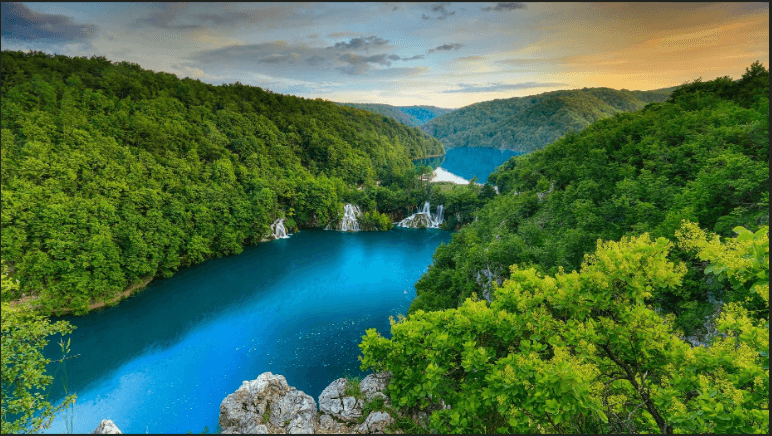

In [3]:
image = cv2.imread("/content/demonstration-image.PNG")
cv2_imshow(image)

#### **Steps**
* convert the image to RGB format
* reshape the image to a 2D array of pixels and 3 color values (RGB)
* cv2.kmeans() function which takes a 2D array as input hence we have to flatten the image
* define stopping criteria for the cluster formation
*Converting back to the original image shape and display the segmented image

In [4]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(336592, 3)


In [5]:
# define stopping criteria in opencv
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

When we see the image primarily there are three main colors (green for trees, blue for the sea/lake and white to orange for the sky). 

As a result, we gonna use three clusters for this image

In [6]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, 
                                  k, 
                                  None, 
                                  criteria, 
                                  10, 
                                  cv2.KMEANS_RANDOM_CENTERS)

Here 
* labels stores  cluster label for each pixel(0/1/2
* centers stores  to the center points of the clusters
* cv2.KMEANS_RANDOM_CENTERS just indicates OpenCV to randomly assign the values of the clusters initially.

In [7]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [8]:
centers

array([[ 13.035985, 134.39548 , 185.26256 ],
       [153.30374 , 160.25224 , 128.49608 ],
       [ 52.335625,  87.116234,  30.718573]], dtype=float32)

In [9]:
# convert back to 8 bit values as we have 
#we converted the flattened image pixel values to floats, 
#we did that because cv2.kmeans() expects it to be in the same format
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [13]:
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

#### **construct the segmented image**

* convert all pixels to the color of the centroids
* reshape back to the original image dimension
* display the image

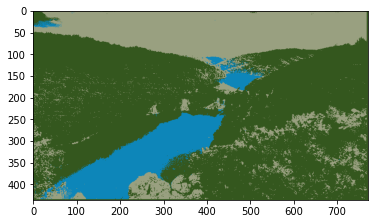

In [10]:
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

#### Disable some clusters in the image and view the image

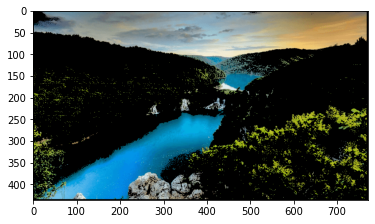

In [11]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()

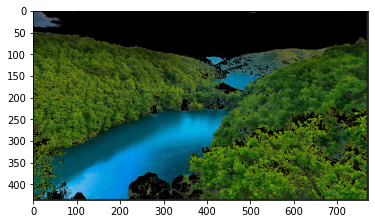

In [14]:
# disable only the cluster number 1 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 1
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()

#### evident from the above image that cluster 1 represents the SKY

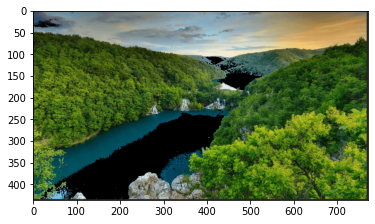

In [15]:
# disable only the cluster number 0 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 0
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()

#### evident from the above image that cluster 0 represents the blue colour that is the river

#### number of Clusters = 8

In [12]:
# number of clusters (K)
k = 8
_, labels, (centers) = cv2.kmeans(pixel_values, 
                                  k, 
                                  None, 
                                  criteria, 
                                  10, 
                                  cv2.KMEANS_RANDOM_CENTERS)

In [13]:
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

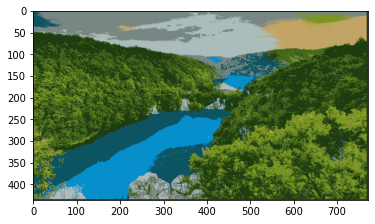

In [14]:
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


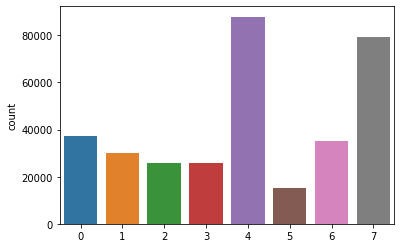

In [15]:
sns.countplot(labels)

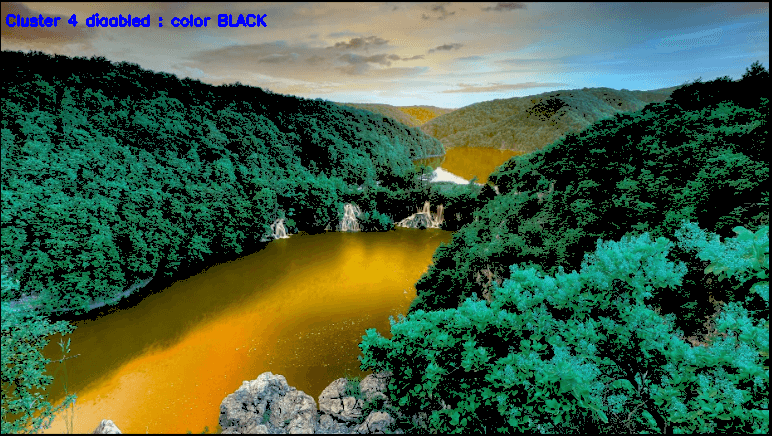

In [18]:
# disable only the cluster number 4 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 4
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
label = f"Cluster {cluster} disabled : color BLACK"
cv2.putText(masked_image,str(label),(5,25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
cv2_imshow(masked_image)


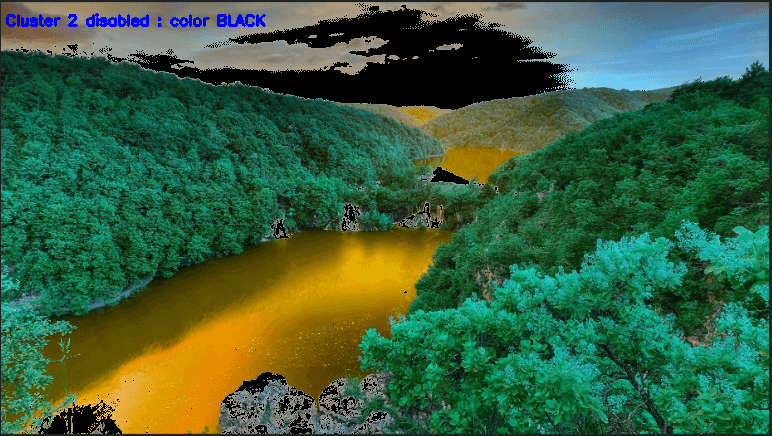

In [19]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
label = f"Cluster {cluster} disabled : color BLACK"
cv2.putText(masked_image,str(label),(5,25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
cv2_imshow(masked_image)


## cluster 6 represents blue colour as evidebt from the visualization